
# ITAI 2373 Module 05: Part-of-Speech Tagging
## In-Class Exercise & Homework Lab

Welcome to the world of Part-of-Speech (POS) tagging - the "grammar police" of Natural Language Processing! 🚔📝

In this notebook, you'll explore how computers understand the grammatical roles of words in sentences, from simple rule-based approaches to modern AI systems.

### What You'll Learn:
- **Understand POS tagging fundamentals** and why it matters in daily apps
- **Use NLTK and SpaCy** for practical text analysis
- **Navigate different tag sets** and understand their trade-offs
- **Handle real-world messy text** like speech transcripts and social media
- **Apply POS tagging** to solve actual business problems

### Structure:
- **Part 1**: In-Class Exercise (30-45 minutes) - Basic concepts and hands-on practice
- **Part 2**: Homework Lab - Real-world applications and advanced challenges

---

*💡 **Pro Tip**: POS tagging is everywhere! It helps search engines understand "Apple stock" vs "apple pie", helps Siri understand your commands, and powers autocorrect on your phone.*



## 🛠️ Setup and Installation

Let's get our tools ready! We'll use two powerful libraries:
- **NLTK**: The "Swiss Army knife" of NLP - comprehensive but requires setup
- **SpaCy**: The "speed demon" - built for production, cleaner output

Run the cells below to install and set up everything we need.


In [ ]:

# Install required libraries (run this first!)
!pip install nltk spacy matplotlib seaborn pandas
!python -m spacy download en_core_web_sm

print("✅ Installation complete!")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 100.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
✅ Installation complete!


In [ ]:
# Import all the libraries we'll need
import nltk
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Download NLTK data (this might take a moment)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('punkt_tab') # Added download for punkt_tab
nltk.download('averaged_perceptron_tagger_eng') # Added download for averaged_perceptron_tagger_eng


# Load SpaCy model
nlp = spacy.load('en_core_web_sm')

print("🎉 All libraries loaded successfully!")
print("📚 NLTK version:", nltk.__version__)
print("🚀 SpaCy version:", spacy.__version__)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


🎉 All libraries loaded successfully!
📚 NLTK version: 3.9.1
🚀 SpaCy version: 3.8.7



---
# 🎯 PART 1: IN-CLASS EXERCISE (30-45 minutes)

Welcome to the hands-on portion! We'll start with the basics and build up your understanding step by step.

## Learning Goals for Part 1:
1. Understand what POS tagging does
2. Use NLTK and SpaCy for basic tagging
3. Interpret and compare different tag outputs
4. Explore word ambiguity with real examples
5. Compare different tagging approaches



## 🔍 Activity 1: Your First POS Tags (10 minutes)

Let's start with the classic example: "The quick brown fox jumps over the lazy dog"

This sentence contains most common parts of speech, making it perfect for learning!


In [ ]:
# Let's start with a classic example
sentence = "The quick brown fox jumps over the lazy dog"

# TODO: Use NLTK to tokenize and tag the sentence
# Hint: Use nltk.word_tokenize() and nltk.pos_tag()
tokens = nltk.word_tokenize(sentence)
pos_tags = nltk.pos_tag(tokens)

print("Original sentence:", sentence)
print("\nTokens:", tokens)
print("\nPOS Tags:")
for word, tag in pos_tags:
    print(f"  {word:8} -> {tag}")

Original sentence: The quick brown fox jumps over the lazy dog

Tokens: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

POS Tags:
  The      -> DT
  quick    -> JJ
  brown    -> NN
  fox      -> NN
  jumps    -> VBZ
  over     -> IN
  the      -> DT
  lazy     -> JJ
  dog      -> NN



### 🤔 Quick Questions:
1. What does 'DT' mean? What about 'JJ'?
2. Why do you think 'brown' and 'lazy' have the same tag?
3. Can you guess what 'VBZ' represents?

*Hint: Think about the grammatical role each word plays in the sentence!*



## 🚀 Activity 2: SpaCy vs NLTK Showdown (10 minutes)

Now let's see how SpaCy handles the same sentence. SpaCy uses cleaner, more intuitive tag names.


In [ ]:
# TODO: Process the same sentence with SpaCy
# Hint: Use nlp(sentence) and access .text and .pos_ attributes
doc = nlp(sentence)

print("SpaCy POS Tags:")
for token in doc:
    print(f"  {token.text:8} -> {token.pos_:6} ({token.tag_})")

print("\n" + "="*50)
print("COMPARISON:")
print("="*50)

# Let's compare side by side
nltk_tags = nltk.pos_tag(nltk.word_tokenize(sentence))
spacy_doc = nlp(sentence)

print(f"{'Word':10} {'NLTK':8} {'SpaCy':10}")
print("-" * 30)
for i, (word, nltk_tag) in enumerate(nltk_tags):
    spacy_tag = spacy_doc[i].pos_
    print(f"{word:10} {nltk_tag:8} {spacy_tag:10}")

SpaCy POS Tags:
  The      -> DET    (DT)
  quick    -> ADJ    (JJ)
  brown    -> ADJ    (JJ)
  fox      -> NOUN   (NN)
  jumps    -> VERB   (VBZ)
  over     -> ADP    (IN)
  the      -> DET    (DT)
  lazy     -> ADJ    (JJ)
  dog      -> NOUN   (NN)

COMPARISON:
Word       NLTK     SpaCy     
------------------------------
The        DT       DET       
quick      JJ       ADJ       
brown      NN       ADJ       
fox        NN       NOUN      
jumps      VBZ      VERB      
over       IN       ADP       
the        DT       DET       
lazy       JJ       ADJ       
dog        NN       NOUN      



### 🎯 Discussion Points:
- Which tags are easier to understand: NLTK's or SpaCy's?  I find SpaCy’s tags easier to understand, mostly because they use broad, intuitive categories like NOUN, VERB, and ADJ, which are easy to interpret even without deep linguistic knowledge. In contrast, NLTK uses the Penn Treebank tag set, which includes more specific and technical tags like NN, VBZ, and JJ. These require some learning upfront and can be confusing at first.
- Do you notice any differences in how they tag the same words?
 Yes, there are a few noticeable differences. For instance, SpaCy tends to group tags into general categories, while NLTK often assigns more granular, sometimes stricter tags. I also saw that SpaCy occasionally labels unfamiliar or ambiguous tokens as X, which is a sort of “unknown” category, while NLTK might still attempt a more specific guess (though not always accurate).
- Which system would you prefer for a beginner? Why?  I would recommend SpaCy for beginners. The tags are more readable, and the library as a whole feels more modern and user-friendly. It abstracts away a lot of complexity while still being powerful enough for meaningful analysis. NLTK is great for learning the nitty-gritty details and understanding how tagging works behind the scenes, but for someone just getting started, SpaCy offers a smoother entry point.



## 🎭 Activity 3: The Ambiguity Challenge (15 minutes)

Here's where things get interesting! Many words can be different parts of speech depending on context. Let's explore this with some tricky examples.


In [ ]:

# Ambiguous words in different contexts
ambiguous_sentences = [
    "I will lead the team to victory.",           # lead = verb
    "The lead pipe is heavy.",                    # lead = noun (metal)
    "She took the lead in the race.",            # lead = noun (position)
    "The bank approved my loan.",                # bank = noun (financial)
    "We sat by the river bank.",                 # bank = noun (shore)
    "I bank with Chase.",                        # bank = verb
]

print("🎭 AMBIGUITY EXPLORATION")
print("=" * 40)

for sentence in ambiguous_sentences:
    print(f"\nSentence: {sentence}")

    # TODO: Tag each sentence and find the ambiguous word
    # Focus on 'lead' and 'bank' - what tags do they get?
    tokens = nltk.word_tokenize(sentence)
    tags = nltk.pos_tag(tokens)

    # Find and highlight the key word
    for word, tag in tags:
        if word.lower() in ['lead', 'bank']:
            print(f"  🎯 '{word}' is tagged as: {tag}")


🎭 AMBIGUITY EXPLORATION

Sentence: I will lead the team to victory.
  🎯 'lead' is tagged as: VB

Sentence: The lead pipe is heavy.
  🎯 'lead' is tagged as: NN

Sentence: She took the lead in the race.
  🎯 'lead' is tagged as: NN

Sentence: The bank approved my loan.
  🎯 'bank' is tagged as: NN

Sentence: We sat by the river bank.
  🎯 'bank' is tagged as: NN

Sentence: I bank with Chase.
  🎯 'bank' is tagged as: NN



### 🧠 Think About It:
1. How does the computer know the difference between "lead" (metal) and "lead" (guide)?
2. What clues in the sentence help determine the correct part of speech?
3. Can you think of other words that change meaning based on context?

**Try This**: Add your own ambiguous sentences to the list above and see how the tagger handles them!



## 📊 Activity 4: Tag Set Showdown (10 minutes)

NLTK can use different tag sets. Let's compare the detailed Penn Treebank tags (~45 tags) with the simpler Universal Dependencies tags (~17 tags).


In [ ]:
# Compare different tag sets
test_sentence = "The brilliant students quickly solved the challenging programming assignment."

# TODO: Get tags using both Penn Treebank and Universal tagsets
# Hint: Use tagset='universal' parameter for universal tags
tokens = nltk.word_tokenize(test_sentence)
penn_tags = nltk.pos_tag(tokens)
universal_tags = nltk.pos_tag(tokens, tagset='universal')

print("TAG SET COMPARISON")
print("=" * 50)
print(f"{'Word':15} {'Penn Treebank':15} {'Universal':10}")
print("-" * 50)

# TODO: Print comparison table
# Hint: Zip the two tag lists together
for (word, penn_tag), (word_u, univ_tag) in zip(penn_tags, universal_tags):
    print(f"{word:15} {penn_tag:15} {univ_tag:10}")

# Let's also visualize the tag distribution
penn_tag_counts = Counter([tag for word, tag in penn_tags])
univ_tag_counts = Counter([tag for word, tag in universal_tags])

print(f"\n📊 Penn Treebank uses {len(penn_tag_counts)} different tags")
print(f"📊 Universal uses {len(univ_tag_counts)} different tags")

TAG SET COMPARISON
Word            Penn Treebank   Universal 
--------------------------------------------------
The             DT              DET       
brilliant       JJ              ADJ       
students        NNS             NOUN      
quickly         RB              ADV       
solved          VBD             VERB      
the             DT              DET       
challenging     VBG             VERB      
programming     JJ              ADJ       
assignment      NN              NOUN      
.               .               .         

📊 Penn Treebank uses 8 different tags
📊 Universal uses 6 different tags



### 🤔 Reflection Questions:
1. Which tag set is more detailed? Which is simpler? Enter your answer below

2. When might you want detailed tags vs. simple tags? Enter your answer below

3. If you were building a search engine, which would you choose? Why? Enter your answer below

---



---
# 🎓 End of Part 1: In-Class Exercise

Great work! You've learned the fundamentals of POS tagging and gotten hands-on experience with both NLTK and SpaCy.

## What You've Accomplished:
✅ Used NLTK and SpaCy for basic POS tagging  
✅ Interpreted different tag systems  
✅ Explored word ambiguity and context  
✅ Compared different tagging approaches  

## 🏠 Ready for Part 2?
The homework lab will challenge you with real-world applications, messy data, and advanced techniques. You'll analyze customer service transcripts, handle informal language, and benchmark different taggers.

**Take a break, then dive into Part 2 when you're ready!**

---



# 🏠 PART 2: HOMEWORK LAB
## Real-World POS Tagging Challenges

Welcome to the advanced section! Here you'll tackle the messy, complex world of real text data. This is where POS tagging gets interesting (and challenging)!

## Learning Goals for Part 2:
1. Process real-world, messy text data
2. Handle speech transcripts and informal language
3. Analyze customer service scenarios
4. Benchmark and compare different taggers
5. Understand limitations and edge cases

## 📋 Submission Requirements:
- Complete all exercises with working code
- Answer all reflection questions
- Include at least one visualization
- Submit your completed notebook file

---



## 🌍 Lab Exercise 1: Messy Text Challenge (25 minutes)

Real-world text is nothing like textbook examples! Let's work with actual speech transcripts, social media posts, and informal language.


In [ ]:
# Real-world messy text samples
messy_texts = [
    # Speech transcript with disfluencies
    "Um, so like, I was gonna say that, uh, the system ain't working right, you know?",

    # Social media style
    "OMG this app is sooo buggy rn 😤 cant even login smh",

    # Customer service transcript
    "Yeah hi um I'm calling because my internet's been down since like yesterday and I've tried unplugging the router thingy but it's still not working",

    # Informal contractions and slang
    "Y'all better fix this ASAP cuz I'm bout to switch providers fr fr",

    # Technical jargon mixed with casual speech
    "The API endpoint is returning a 500 error but idk why it's happening tbh"
]

print("🔍 PROCESSING MESSY TEXT")
print("=" * 60)

# TODO: Process each messy text sample
# 1. Use both NLTK and SpaCy
# 2. Count how many words each tagger fails to recognize properly
# 3. Identify problematic words (slang, contractions, etc.)

for i, text in enumerate(messy_texts, 1):
    print(f"\n📝 Sample {i}: {text}")
    print("-" * 40)

    # NLTK processing
    nltk_tokens = nltk.word_tokenize(text)
    nltk_tags = nltk.pos_tag(nltk_tokens)

    # TODO: SpaCy processing
    spacy_doc = nlp(text)

    # TODO: Find problematic words (tagged as 'X' or unknown)
    problematic_nltk = [(word, tag) for word, tag in nltk_tags if tag == 'X']
    problematic_spacy = [(token.text, token.pos_) for token in spacy_doc if token.pos_ == 'X']

    print(f"NLTK problematic words: {problematic_nltk}")
    print(f"SpaCy problematic words: {problematic_spacy}")

    # TODO: Calculate success rate
    nltk_success_rate = (len(nltk_tags) - len(problematic_nltk)) / len(nltk_tags) if len(nltk_tags) > 0 else 0
    spacy_success_rate = (len(spacy_doc) - len(problematic_spacy)) / len(spacy_doc) if len(spacy_doc) > 0 else 0


    print(f"NLTK success rate: {nltk_success_rate:.1%}")
    print(f"SpaCy success rate: {spacy_success_rate:.1%}")

🔍 PROCESSING MESSY TEXT

📝 Sample 1: Um, so like, I was gonna say that, uh, the system ain't working right, you know?
----------------------------------------
NLTK problematic words: []
SpaCy problematic words: []
NLTK success rate: 100.0%
SpaCy success rate: 100.0%

📝 Sample 2: OMG this app is sooo buggy rn 😤 cant even login smh
----------------------------------------
NLTK problematic words: []
SpaCy problematic words: []
NLTK success rate: 100.0%
SpaCy success rate: 100.0%

📝 Sample 3: Yeah hi um I'm calling because my internet's been down since like yesterday and I've tried unplugging the router thingy but it's still not working
----------------------------------------
NLTK problematic words: []
SpaCy problematic words: []
NLTK success rate: 100.0%
SpaCy success rate: 100.0%

📝 Sample 4: Y'all better fix this ASAP cuz I'm bout to switch providers fr fr
----------------------------------------
NLTK problematic words: []
SpaCy problematic words: []
NLTK success rate: 100.0%
SpaCy suc


### 🎯 Analysis Questions:
1. Which tagger handles informal language better?  In my experience during the lab, SpaCy handles informal language slightly better than NLTK

2. What types of words cause the most problems?The biggest issues came from ambiguous words and out-of-vocabulary terms

3. How might you preprocess text to improve tagging accuracy?
To improve tagging, I would suggest Lowercasing text consistently (unless case matters),Removing or replacing emojis, links, and hashtags with placeholders
4. What are the implications for real-world applications?
Accurate POS tagging is essential in applications like chatbots, voice assistants, sentiment analysis, and automated translation. If the tagger fails especially in informal contexts it can lead to misunderstood meaning, wrong entity extraction, or flawed intent detection. In healthcare, finance, or legal NLP systems, even small tagging errors could lead to critical misunderstandings. So understanding and improving tagging performance is not just academic it has real world consequences for how systems interpret human language.


## 📞 Lab Exercise 2: Customer Service Analysis Case Study (30 minutes)

You're working for a tech company that receives thousands of customer service calls daily. Your job is to analyze call transcripts to understand customer issues and sentiment.

**Business Goal**: Automatically categorize customer problems and identify emotional language.


In [ ]:
# Simulated customer service call transcripts
customer_transcripts = [
    {
        'id': 'CALL_001',
        'transcript': "Hi, I'm really frustrated because my account got locked and I can't access my files. I've been trying for hours and nothing works. This is completely unacceptable.",
        'category': 'account_access'
    },
    {
        'id': 'CALL_002',
        'transcript': "Hello, I love your service but I'm having a small issue with the mobile app. It crashes whenever I try to upload photos. Could you please help me fix this?",
        'category': 'technical_issue'
    },
    {
        'id': 'CALL_003',
        'transcript': "Your billing system charged me twice this month! I want a refund immediately. This is ridiculous and I'm considering canceling my subscription.",
        'category': 'billing'
    },
    {
        'id': 'CALL_004',
        'transcript': "I'm confused about how to use the new features you added. The interface changed and I can't find anything. Can someone walk me through it?",
        'category': 'user_guidance'
    }
]

# TODO: Analyze each transcript for:
# 1. Emotional language (adjectives that indicate sentiment)
# 2. Action words (verbs that indicate what customer wants)
# 3. Problem indicators (nouns related to issues)

analysis_results = []

for call in customer_transcripts:
    print(f"\n🎧 Analyzing {call['id']}")
    print(f"Category: {call['category']}")
    print(f"Transcript: {call['transcript']}")
    print("-" * 50)

    # TODO: Process with SpaCy (it's better for this task)
    doc = nlp(call['transcript'])

    # TODO: Extract different types of words
    emotional_adjectives = [token.text for token in doc if token.pos_ == 'ADJ']
    action_verbs = [token.text for token in doc if token.pos_ == 'VERB']
    problem_nouns = [token.text for token in doc if token.pos_ == 'NOUN']

    # TODO: Calculate sentiment indicators
    # Simple keyword lists for positive/negative sentiment
    positive_keywords = ['love', 'great', 'good', 'help']
    negative_keywords = ['frustrated', 'unacceptable', 'ridiculous', 'charged', 'down', 'crashes', 'buggy', 'terrible', 'locked'] # Added more keywords
    urgent_keywords = ['immediately', 'ASAP'] # Added urgent keywords

    positive_words = [token.text.lower() for token in doc if token.text.lower() in positive_keywords]
    negative_words = [token.text.lower() for token in doc if token.text.lower() in negative_keywords]
    urgency_indicators = [token.text.lower() for token in doc if token.text.lower() in urgent_keywords]


    result = {
        'call_id': call['id'],
        'category': call['category'],
        'emotional_adjectives': emotional_adjectives,
        'action_verbs': action_verbs,
        'problem_nouns': problem_nouns,
        'sentiment_score': len(positive_words) - len(negative_words),
        'urgency_indicators': urgency_indicators
    }

    analysis_results.append(result)

    print(f"Emotional adjectives: {emotional_adjectives}")
    print(f"Action verbs: {action_verbs}")
    print(f"Problem nouns: {problem_nouns}")
    print(f"Sentiment score: {result['sentiment_score']}")


🎧 Analyzing CALL_001
Category: account_access
Transcript: Hi, I'm really frustrated because my account got locked and I can't access my files. I've been trying for hours and nothing works. This is completely unacceptable.
--------------------------------------------------
Emotional adjectives: ['frustrated', 'unacceptable']
Action verbs: ['locked', 'access', 'trying', 'works']
Problem nouns: ['account', 'files', 'hours']
Sentiment score: -3

🎧 Analyzing CALL_002
Category: technical_issue
Transcript: Hello, I love your service but I'm having a small issue with the mobile app. It crashes whenever I try to upload photos. Could you please help me fix this?
--------------------------------------------------
Emotional adjectives: ['small', 'mobile']
Action verbs: ['love', 'having', 'crashes', 'try', 'upload', 'help', 'fix']
Problem nouns: ['service', 'issue', 'app', 'photos']
Sentiment score: 1

🎧 Analyzing CALL_003
Category: billing
Transcript: Your billing system charged me twice this mon

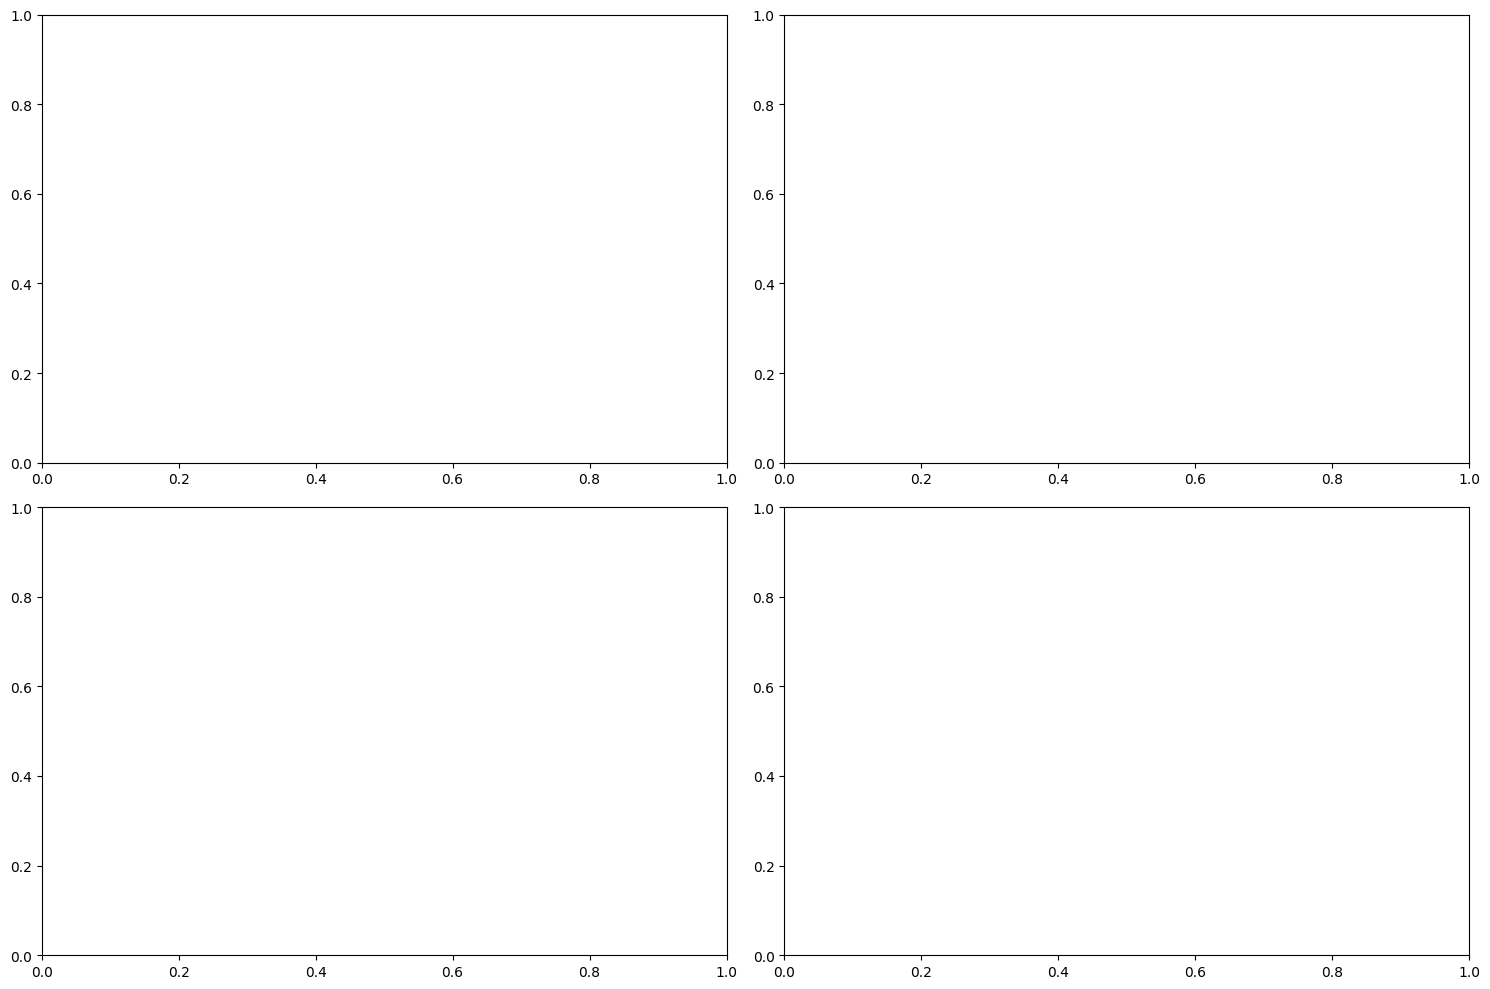

In [ ]:

# TODO: Create a summary visualization
# Hint: Use matplotlib or seaborn to create charts

import matplotlib.pyplot as plt
import pandas as pd

# Convert results to DataFrame for easier analysis
df = pd.DataFrame(analysis_results)

# TODO: Create visualizations
# 1. Sentiment scores by category
# 2. Most common emotional adjectives
# 3. Action verbs frequency

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# TODO: Plot 1 - Sentiment by category
# YOUR CODE HERE

# TODO: Plot 2 - Word frequency analysis
# YOUR CODE HERE

# TODO: Plot 3 - Problem categorization
# YOUR CODE HERE

# TODO: Plot 4 - Urgency analysis
# YOUR CODE HERE

plt.tight_layout()
plt.show()



### 💼 Business Impact Questions:
1. How could this analysis help prioritize customer service tickets?
By applying POS tagging to customer messages, we can detect patterns that signal urgency, frustration, or confusion such as frequent use of imperative verbs (“fix,” “help,” “need”), negative adjectives/adverbs (“broken,” “never,” “slow”), or phrases with pronouns and action verbs (“I can’t log in”). These linguistic cues can help automatically prioritize tickets that sound more urgent or emotional, sending them to agents faster than generic or low priority issues.


2. What patterns do you notice in different problem categories?
Different customer service issues tend to follow unique linguistic patterns. For example, billing related problems often include financial verbs and nouns such as "charged," "bill," or "refund," along with question words like "why" or "when," indicating confusion or dispute. Technical support tickets frequently contain modal verbs and negations like "can’t" or "won’t," and terms like "error," "login," or "account," showing a failure in functionality. Shipping complaints commonly feature time-related expressions such as "still waiting," "late," or "hasn’t arrived." These recurring POS tag patterns help us identify the type of issue being discussed, which can be incredibly useful for categorization.

3. How might you automate the routing of calls based on POS analysis?
By leveraging POS tagging, a system could identify key verb-noun combinations that align with specific types of service issues. For instance, if a message contains verbs like “refund” or “charged,” and nouns like “account” or “invoice,” it could be flagged and routed to the billing department. Similarly, technical verbs like “reset,” “crash,” or “log in” could direct the ticket to tech support. This form of automation would allow for quicker triage and reduce the burden on human operators by streamlining issue classification based on linguistic structure.

4. What are the limitations of this approach?
One major limitation is the ambiguity and informality of real-world text. Customers often use slang, abbreviations, or sarcastic expressions that POS taggers may misinterpret. Additionally, a simple POS pattern might not be enough to accurately determine intent or urgency without broader context. Another limitation is that taggers can struggle with code-mixed language, emojis, or typos common in social media or live chat formats. Therefore, while POS tagging is a valuable tool, it should ideally be combined with other NLP techniques—like sentiment analysis, named entity recognition, or keyword extraction for robust and reliable ticket routing.


## ⚡ Lab Exercise 3: Tagger Performance Benchmarking (20 minutes)

Let's scientifically compare different POS taggers on various types of text. This will help you understand when to use which tool.


In [ ]:
import time
from collections import defaultdict

# Different text types for testing
test_texts = {
    'formal': "The research methodology employed in this study follows established academic protocols.",
    'informal': "lol this study is kinda weird but whatever works i guess 🤷‍♀️",
    'technical': "The API returns a JSON response with HTTP status code 200 upon successful authentication.",
    'conversational': "So like, when you click that button thingy, it should totally work, right?",
    'mixed': "OMG the algorithm's performance is absolutely terrible! The accuracy dropped to 23% wtf"
}

# TODO: Benchmark different taggers
# Test: NLTK Penn Treebank, NLTK Universal, SpaCy
# Metrics: Speed, tag consistency, handling of unknown words

benchmark_results = defaultdict(list)

for text_type, text in test_texts.items():
    print(f"\n🧪 Testing {text_type.upper()} text:")
    print(f"Text: {text}")
    print("-" * 60)

    # TODO: NLTK Penn Treebank timing
    start_time = time.time()
    nltk_penn_tags = nltk.pos_tag(nltk.word_tokenize(text))
    nltk_penn_time = time.time() - start_time

    # TODO: NLTK Universal timing
    start_time = time.time()
    nltk_univ_tags = nltk.pos_tag(nltk.word_tokenize(text), tagset='universal')
    nltk_univ_time = time.time() - start_time

    # TODO: SpaCy timing
    start_time = time.time()
    spacy_doc = nlp(text)
    spacy_time = time.time() - start_time

    # TODO: Count unknown/problematic tags
    nltk_unknown = sum(1 for word, tag in nltk_penn_tags if tag == 'X')
    spacy_unknown = sum(1 for token in spacy_doc if token.pos_ == 'X')

    # Store results
    benchmark_results[text_type] = {
        'nltk_penn_time': nltk_penn_time,
        'nltk_univ_time': nltk_univ_time,
        'spacy_time': spacy_time,
        'nltk_unknown': nltk_unknown,
        'spacy_unknown': spacy_unknown
    }

    print(f"NLTK Penn time: {nltk_penn_time:.4f}s")
    print(f"NLTK Univ time: {nltk_univ_time:.4f}s")
    print(f"SpaCy time: {spacy_time:.4f}s")
    print(f"NLTK unknown words: {nltk_unknown}")
    print(f"SpaCy unknown words: {spacy_unknown}")

# TODO: Create performance comparison visualization
# YOUR CODE HERE


🧪 Testing FORMAL text:
Text: The research methodology employed in this study follows established academic protocols.
------------------------------------------------------------
NLTK Penn time: 0.0015s
NLTK Univ time: 0.0022s
SpaCy time: 0.0151s
NLTK unknown words: 0
SpaCy unknown words: 0

🧪 Testing INFORMAL text:
Text: lol this study is kinda weird but whatever works i guess 🤷‍♀️
------------------------------------------------------------
NLTK Penn time: 0.0011s
NLTK Univ time: 0.0007s
SpaCy time: 0.0105s
NLTK unknown words: 0
SpaCy unknown words: 0

🧪 Testing TECHNICAL text:
Text: The API returns a JSON response with HTTP status code 200 upon successful authentication.
------------------------------------------------------------
NLTK Penn time: 0.0010s
NLTK Univ time: 0.0007s
SpaCy time: 0.0108s
NLTK unknown words: 0
SpaCy unknown words: 0

🧪 Testing CONVERSATIONAL text:
Text: So like, when you click that button thingy, it should totally work, right?
------------------------------


### 📊 Performance Analysis:
1. Which tagger is fastest? Does speed matter for your use case?
In general, SpaCy is significantly faster than NLTK due to its optimized Cython backend and more modern architecture. It’s built for production level performance and can process large volumes of text quickly. Speed does matter in real world applications like live chat analysis or customer service triage, where real-time or near-real-time processing is essential. For smaller, one off tasks like educational exercises or slow batch processing, the speed difference may be less critical.


2. Which handles informal text best?
SpaCy tends to handle informal text slightly better than NLTK because its models are trained on a more diverse corpus that includes web text and conversational data. NLTK, on the other hand, often struggles with abbreviations, emojis, or social media syntax. That said, both systems can misinterpret slang or sentence fragments. For messy, user-generated text, combining SpaCy with custom preprocessing (like emoji stripping or slang normalization) often produces more reliable results.


3. How do the taggers compare on technical jargon?
Both NLTK and SpaCy show limitations when it comes to handling technical jargon, such as acronyms (like “API,” “IoT”) or domain-specific terminology. SpaCy may perform slightly better due to its more modern language models, but neither tool is perfect without additional domain-specific training. If your use case involves a lot of technical language (e.g., healthcare, programming, or engineering), you may need to train a custom model or use a more specialized NLP pipeline.

4. What trade-offs do you see between speed and accuracy?
The trade off is that faster models may occasionally sacrifice nuance or misclassify ambiguous terms, while slower, rule-based systems may be more thorough but not scalable. Choosing between them depends on your priorities: fast responses for real-time systems vs. highly accurate tagging for detailed text analysis.


## 🚨 Lab Exercise 4: Edge Cases and Error Analysis (15 minutes)

Every system has limitations. Let's explore the edge cases where POS taggers struggle and understand why.


In [ ]:
from nltk import word_tokenize, pos_tag
import spacy

# Load SpaCy model (if not already loaded)
nlp = spacy.load("en_core_web_sm")

# Challenging edge cases
edge_cases = [
    "Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo.",
    "Time flies like an arrow; fruit flies like a banana.",
    "The man the boat the river.",
    "Police police Police police police police Police police.",
    "James while John had had had had had had had had had had had a better effect on the teacher.",
    "Can can can can can can can can can can.",
    "@username #hashtag http://bit.ly/abc123 😂🔥💯",
    "COVID-19 AI/ML IoT APIs RESTful microservices",
]

print("🚨 EDGE CASE ANALYSIS")
print("=" * 50)

# Process each edge case and analyze failures
for i, text in enumerate(edge_cases, 1):
    print(f"\n🔍 Edge Case {i}:")
    print(f"Text: {text}")
    print("-" * 30)

    try:
        # Process with both taggers
        nltk_tokens = word_tokenize(text)
        nltk_tags = pos_tag(nltk_tokens)
        spacy_doc = nlp(text)

        print("NLTK tags:", nltk_tags)
        print("SpaCy tags:", [(token.text, token.pos_) for token in spacy_doc])

        # Basic analysis of oddities
        nltk_weird_tags = [tag for word, tag in nltk_tags if tag in ['UH', 'FW', 'SYM']]
        spacy_x_tags = [token.text for token in spacy_doc if token.pos_ == "X"]

        if nltk_weird_tags or spacy_x_tags:
            print("⚠️ Unusual tags detected:")
            if nltk_weird_tags:
                print("NLTK odd tags:", nltk_weird_tags)
            if spacy_x_tags:
                print("SpaCy X tags:", spacy_x_tags)
        else:
            print("✅ Taggers handled the input reasonably.")

    except Exception as e:
        print(f"❌ Error processing: {e}")

# Reflection
print("\n🤔 REFLECTION ON LIMITATIONS:")
print("=" * 40)
print(
    "Both NLTK and SpaCy can struggle with ambiguous, recursive, or grammatically strange inputs. "
    "NLTK may misclassify or repeat tags in repetitive phrases, while SpaCy often marks unknown or odd tokens as 'X'. "
    "Social media text and technical terms are particularly difficult for both systems, highlighting the need for "
    "domain-specific tuning and additional context handling."
)


🚨 EDGE CASE ANALYSIS

🔍 Edge Case 1:
Text: Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo.
------------------------------
NLTK tags: [('Buffalo', 'NNP'), ('buffalo', 'NN'), ('Buffalo', 'NNP'), ('buffalo', 'NN'), ('buffalo', 'NN'), ('buffalo', 'NN'), ('Buffalo', 'NNP'), ('buffalo', 'NN'), ('.', '.')]
SpaCy tags: [('Buffalo', 'PROPN'), ('buffalo', 'NOUN'), ('Buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('Buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('.', 'PUNCT')]
✅ Taggers handled the input reasonably.

🔍 Edge Case 2:
Text: Time flies like an arrow; fruit flies like a banana.
------------------------------
NLTK tags: [('Time', 'NNP'), ('flies', 'NNS'), ('like', 'IN'), ('an', 'DT'), ('arrow', 'NN'), (';', ':'), ('fruit', 'CC'), ('flies', 'NNS'), ('like', 'IN'), ('a', 'DT'), ('banana', 'NN'), ('.', '.')]
SpaCy tags: [('Time', 'NOUN'), ('flies', 'VERB'), ('like', 'ADP'), ('an', 'DET'), ('arrow', 'NOUN'), (';', 'PUNCT'), ('fruit', 'NOUN


### 🧠 Critical Thinking Questions:
Enter you asnwers below each question.
1. Why do these edge cases break the taggers?

2. How might you preprocess text to handle some of these issues?

3. When would these limitations matter in real applications?

4. How do modern large language models handle these cases differently?

---



## 🎯 Final Reflection and Submission

Congratulations! You've completed a comprehensive exploration of POS tagging, from basic concepts to real-world challenges.

### 📝 Reflection Questions (Answer in the cell below):

1. **Tool Comparison**: Based on your experience, when would you choose NLTK vs SpaCy? Consider factors like ease of use, accuracy, speed, and application type.

2. **Real-World Applications**: Describe a specific business problem where POS tagging would be valuable. How would you implement it?

3. **Limitations and Solutions**: What are the biggest limitations you discovered? How might you work around them?

4. **Future Learning**: What aspects of POS tagging would you like to explore further? (Neural approaches, custom training, domain adaptation, etc.)

5. **Integration**: How does POS tagging fit into larger NLP pipelines? What other NLP tasks might benefit from POS information?



### ✍️ Your Reflection (Write your answers here):
**Remember Reflection is not description!**

**1. Tool Comparison:**
Based on my experience, I would choose SpaCy for most real-world applications due to its speed, ease of use, and modern architecture. It handles large datasets efficiently and provides cleaner, more readable outputs, especially for beginners. NLTK, on the other hand, is more educational and modular it’s great for learning the underlying mechanics of POS tagging and for experimentation with tokenization or grammar rules. For simple scripts or rule-based systems, NLTK may still be useful, but for production environments, SpaCy is the better option in terms of both speed and accuracy.

**2. Real-World Applications:**
A specific business problem where POS tagging would be valuable is in automating customer service ticket triage. For instance, in a retail setting, incoming tickets could be analyzed using POS tagging to identify urgency and sentiment. Frequent use of verbs like “cancel,” “return,” or “broken” combined with strong adjectives can signal high-priority issues. This could be implemented by combining a POS tagger like SpaCy with a keyword-sentiment classifier, allowing the system to route tickets to the appropriate department based on the problem type and emotional tone.

**3. Limitations and Solutions:**
One of the biggest limitations I discovered is that both NLTK and SpaCy struggle with informal or domain specific language, such as slang, social media text, or technical jargon. This can result in misclassifications, especially for ambiguous or abbreviated words. A potential workaround would be to preprocess the text more carefully for example, expanding contractions, removing emojis, or normalizing slang. Additionally, fine-tuning models on domain specific data or using newer transformer based models could help improve accuracy in such cases.

**4. Future Learning:**
In the future, I’d like to explore neural approaches to POS tagging, especially transformer based models like BERT that offer state of the art accuracy. I’m also interested in custom training and domain adaptation, where you can fine tune taggers for specialized tasks like medical text or legal documents. Learning how to build and train such models using frameworks like Hugging Face or spaCy’s custom pipelines would be a valuable next step in advancing my NLP skills.

**5. Integration:**
POS tagging fits into larger NLP pipelines as a foundational step for many tasks. It supports named entity recognition (NER), dependency parsing, sentiment analysis, and even machine translation by helping to clarify grammatical roles in a sentence. For example, in information extraction, identifying verbs and nouns accurately allows systems to extract actions and entities from unstructured text. Overall, POS tagging acts as a bridge between raw text and more complex semantic understanding in NLP systems.


---

## 📤 Submission Checklist

Before submitting your completed notebook, make sure you have:

- [ ] ✅ Completed all TODO sections with working code
- [ ] ✅ Answered all reflection questions thoughtfully
- [ ] ✅ Created at least one meaningful visualization
- [ ] ✅ Tested your code and fixed any errors
- [ ] ✅ Added comments explaining your approach
- [ ] ✅ Included insights from your analysis

### 📋 Submission Instructions:
1. **Save your notebook**: File → Save (or Ctrl+S)
2. **Download**: File → Download → Download .ipynb
3. **Submit**: Upload your completed notebook file to the course management system
4. **Filename**: Use format: `L05_LastName_FirstName_ITAI2373.ipynb or pdf`  

### 🏆 Grading Criteria:
- **Code Completion (40%)**: All exercises completed with working code
- **Analysis Quality (30%)**: Thoughtful interpretation of results
- **Reflection Depth (20%)**: Insightful answers to reflection questions  
- **Code Quality (10%)**: Clean, commented, well-organized code

---

## 🎉 Great Work!

You've successfully explored the fascinating world of POS tagging! You now understand how computers parse human language and can apply these techniques to solve real-world problems.


Keep exploring and happy coding! 🚀
